In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import missingno as msg
import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('deliveries.csv')
df1 = pd.read_csv('matches.csv')

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [8]:
df1.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [9]:
df['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

# Ques 1 - win ?

In [10]:
main_df = df1[((df1['team1'] == 'Sunrisers Hyderabad') & (df1['team2'] == 'Rajasthan Royals')) | ((df1['team1'] == 'Rajasthan Royals') & (df1['team2'] == 'Sunrisers Hyderabad'))]
main_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
415,416,2013,Jaipur,2013-04-27,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,8,JP Faulkner,Sawai Mansingh Stadium,VA Kulkarni,K Srinath,NaN
448,449,2013,Hyderabad,2013-05-17,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,23,0,A Mishra,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,AK Chaudhary,NaN
454,455,2013,Delhi,2013-05-22,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,4,BJ Hodge,Feroz Shah Kotla,S Ravi,RJ Tucker,NaN
460,461,2014,Abu Dhabi,2014-04-18,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium,BF Bowden,RK Illingworth,NaN
486,487,2014,Ahmedabad,2014-05-08,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Sunrisers Hyderabad,32,0,B Kumar,"Sardar Patel Stadium, Motera",AK Chaudhary,NJ Llong,NaN
528,529,2015,Visakhapatnam,2015-04-16,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,AM Rahane,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,PG Pathak,S Ravi,NaN
557,558,2015,Mumbai,2015-05-07,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Sunrisers Hyderabad,7,0,EJG Morgan,Brabourne Stadium,JD Cloete,C Shamshuddin,NaN
639,7897,2018,Hyderabad,09/04/18,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan
663,7921,2018,Jaipur,29/04/18,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,11,0,KS Williamson,Sawai Mansingh Stadium,Bruce Oxenford,A Nanda Kishore,S Ravi
703,11144,2019,Hyderabad,29/03/19,Rajasthan Royals,Sunrisers Hyderabad,Rajasthan Royals,bat,normal,0,Sunrisers Hyderabad,0,5,Rashid Khan,Rajiv Gandhi Intl. Cricket Stadium,Bruce Oxenford,C Shamshuddin,KN Anantapadmanabhan


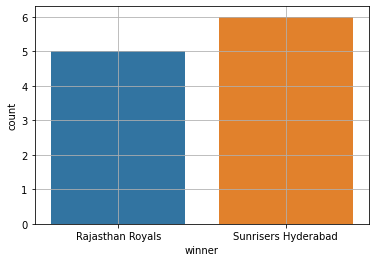

In [11]:
sb.countplot(main_df['winner'])
plt.grid()
plt.show()

In [12]:
main_df['winner'].value_counts()

Sunrisers Hyderabad    6
Rajasthan Royals       5
Name: winner, dtype: int64

In [14]:
#last 3 season
recent_match = main_df[main_df['season'] >= 2017]

In [15]:
recent_match

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
639,7897,2018,Hyderabad,09/04/18,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan
663,7921,2018,Jaipur,29/04/18,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,11,0,KS Williamson,Sawai Mansingh Stadium,Bruce Oxenford,A Nanda Kishore,S Ravi
703,11144,2019,Hyderabad,29/03/19,Rajasthan Royals,Sunrisers Hyderabad,Rajasthan Royals,bat,normal,0,Sunrisers Hyderabad,0,5,Rashid Khan,Rajiv Gandhi Intl. Cricket Stadium,Bruce Oxenford,C Shamshuddin,KN Anantapadmanabhan
740,11336,2019,Jaipur,27/04/19,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,JD Unadkat,Sawai Mansingh Stadium,Yeshwant Barde,Nand Kishore,Sundaram Ravi


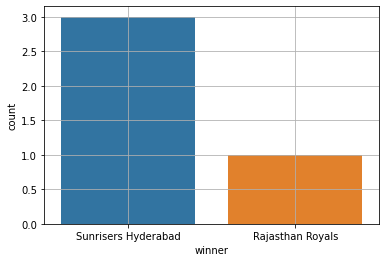

In [16]:
#for last 3 match
sb.countplot(recent_match['winner'])
plt.grid()
plt.show()

In [17]:
recent_match['winner'].value_counts()

Sunrisers Hyderabad    3
Rajasthan Royals       1
Name: winner, dtype: int64

In [18]:
main_df.groupby(['toss_decision' , 'winner'])[['team2','team1']].count()

team2  team1
toss_decision winner                           
bat           Rajasthan Royals         2      2
              Sunrisers Hyderabad      3      3
field         Rajasthan Royals         3      3
              Sunrisers Hyderabad      3      3

In [19]:
recent_match.groupby(['toss_decision' , 'winner'])[['team2','team1']].count()

team2  team1
toss_decision winner                           
bat           Sunrisers Hyderabad      2      2
field         Rajasthan Royals         1      1
              Sunrisers Hyderabad      1      1

# Take aways : 
### 1 - From the entire dataset ,we can see that SRH has won 6 times and RR 5 ,and from past 3 seasons , SRH has won 3 times and RR 1
### 2 - Since , the match will be played in Dubai International Stadium , Bowlers play a major role here , so SRH bowlers have a strong hold on this !
### 3 - In the last face-off , RR won with a 5 ball remaining
### 4 - This year ,RR player are playing better than SRH ,and the openers are doing good job !


# Ques 1 ans - RR

In [20]:
#############################################################################################################################

# Ques 2 - Balls taken by rashid khan to take his first wicket ?

In [22]:
main_df_team = df[(((df['batting_team'] == 'Rajasthan Royals')  & (df['bowling_team'] == 'Sunrisers Hyderabad')) | ((df['batting_team'] == 'Sunrisers Hyderabad')  & (df['bowling_team'] == 'Rajasthan Royals')))]
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
98439,416,1,Sunrisers Hyderabad,Rajasthan Royals,1,1,PA Reddy,S Dhawan,A Chandila,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98440,416,1,Sunrisers Hyderabad,Rajasthan Royals,1,2,PA Reddy,S Dhawan,A Chandila,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98441,416,1,Sunrisers Hyderabad,Rajasthan Royals,1,3,PA Reddy,S Dhawan,A Chandila,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
98442,416,1,Sunrisers Hyderabad,Rajasthan Royals,1,4,PA Reddy,S Dhawan,A Chandila,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98443,416,1,Sunrisers Hyderabad,Rajasthan Royals,1,5,PA Reddy,S Dhawan,A Chandila,0,...,0,0,0,0,0,0,0,PA Reddy,caught,SR Watson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175660,11336,2,Rajasthan Royals,Sunrisers Hyderabad,19,3,A Turner,SV Samson,S Kaul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
175661,11336,2,Rajasthan Royals,Sunrisers Hyderabad,19,4,A Turner,SV Samson,S Kaul,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175662,11336,2,Rajasthan Royals,Sunrisers Hyderabad,19,5,SV Samson,A Turner,S Kaul,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN
175663,11336,2,Rajasthan Royals,Sunrisers Hyderabad,19,6,A Turner,SV Samson,S Kaul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [24]:
#select rashid

In [25]:
main_df_team['bowler'].unique()

array(['A Chandila', 'JP Faulkner', 'SR Watson', 'KK Cooper',
       'SK Trivedi', 'STR Binny', 'DW Steyn', 'I Sharma', 'NLTC Perera',
       'DJG Sammy', 'A Mishra', 'KV Sharma', 'BJ Hodge', 'PV Tambe',
       'VS Malik', 'DS Kulkarni', 'KW Richardson', 'R Bhatia', 'B Kumar',
       'MC Henriques', 'IK Pathan', 'TG Southee', 'CH Morris', 'DJ Hooda',
       'TA Boult', 'P Kumar', 'RS Bopara', 'A Ashish Reddy', 'B Stanlake',
       'Shakib Al Hasan', 'S Kaul', 'Rashid Khan', 'JD Unadkat',
       'K Gowtham', 'B Laughlin', 'S Gopal', 'BA Stokes', 'D Short',
       'J Archer', 'I Sodhi', 'M Lomror', 'Sandeep Sharma',
       'Basil Thampi', 'YK Pathan', 'S Sharma', 'S Nadeem', 'V Shankar',
       'VR Aaron', 'O Thomas', 'R Parag', 'K Ahmed'], dtype=object)

In [26]:
rashid = main_df_team[((main_df_team['bowling_team'] == 'Sunrisers Hyderabad') & (main_df_team['bowler'] == 'Rashid Khan'))]
rashid

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
151233,7897,1,Rajasthan Royals,Sunrisers Hyderabad,8,1,BA Stokes,SV Samson,Rashid Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
151234,7897,1,Rajasthan Royals,Sunrisers Hyderabad,8,2,BA Stokes,SV Samson,Rashid Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
151235,7897,1,Rajasthan Royals,Sunrisers Hyderabad,8,3,BA Stokes,SV Samson,Rashid Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
151236,7897,1,Rajasthan Royals,Sunrisers Hyderabad,8,4,BA Stokes,SV Samson,Rashid Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
151237,7897,1,Rajasthan Royals,Sunrisers Hyderabad,8,5,SV Samson,BA Stokes,Rashid Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175628,11336,2,Rajasthan Royals,Sunrisers Hyderabad,14,2,SV Samson,SPD Smith,Rashid Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175629,11336,2,Rajasthan Royals,Sunrisers Hyderabad,14,3,SPD Smith,SV Samson,Rashid Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175630,11336,2,Rajasthan Royals,Sunrisers Hyderabad,14,4,SV Samson,SPD Smith,Rashid Khan,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
175631,11336,2,Rajasthan Royals,Sunrisers Hyderabad,14,5,SV Samson,SPD Smith,Rashid Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [38]:
rashid.groupby(['match_id','over','ball'])['player_dismissed'].count()

match_id  over  ball
7897      8     1       0
                2       0
                3       0
                4       0
                5       0
                       ..
11336     14    2       0
                3       0
                4       0
                5       0
                6       0
Name: player_dismissed, Length: 96, dtype: int64

In [55]:
rashid['player_dismissed']

151233    NaN
151234    NaN
151235    NaN
151236    NaN
151237    NaN
         ... 
175628    NaN
175629    NaN
175630    NaN
175631    NaN
175632    NaN
Name: player_dismissed, Length: 96, dtype: object

In [65]:
rashid['player_dismissed'].unique()

array([nan, 'JC Buttler', 'L Livingstone'], dtype=object)

In [69]:
rashid['player_dismissed'] = rashid['player_dismissed'].replace(np.NaN , 0)

In [71]:
rashid['player_dismissed'].unique()

array([0, 'JC Buttler', 'L Livingstone'], dtype=object)

In [78]:
rashid['match_id'].unique()

array([ 7897,  7921, 11144, 11336], dtype=int64)

In [79]:
match = rashid['match_id'].unique()
x = []
c = 0
for i in match:
    m = rashid[rashid['match_id'] == i]
    m = m.reset_index(drop = True)
    for i in range(len(m)):
        if m.loc[i , 'player_dismissed'] == 0:
            c = c+1
        else:
            x.append(c)
            c = 0
            

In [80]:
x

[19, 15, 13, 34]

In [84]:
# avg balls required
np.array(x).mean()

20.25

In [85]:
# now lets check for all team

In [86]:
main_df_team_all = df[((((df['bowling_team'] == 'Sunrisers Hyderabad'))))]
main_df_team_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178586,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,2,A Mishra,K Paul,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178587,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,3,K Paul,A Mishra,K Ahmed,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178588,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,4,K Paul,A Mishra,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178589,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,5,A Mishra,K Paul,K Ahmed,0,...,0,0,0,0,0,0,0,A Mishra,obstructing the field,NaN


In [175]:
rashid_all = main_df_team_all[((main_df_team_all['bowling_team'] == 'Sunrisers Hyderabad') & (main_df_team_all['bowler'] == 'Rashid Khan'))]
rashid_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
157,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,1,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
158,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,2,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
159,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,3,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN
161,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,5,TM Head,CH Gayle,Rashid Khan,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178555,11413,2,Delhi Capitals,Sunrisers Hyderabad,15,2,AR Patel,RR Pant,Rashid Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178556,11413,2,Delhi Capitals,Sunrisers Hyderabad,15,3,AR Patel,RR Pant,Rashid Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178557,11413,2,Delhi Capitals,Sunrisers Hyderabad,15,4,AR Patel,RR Pant,Rashid Khan,0,...,0,0,0,0,0,0,0,AR Patel,caught,WP Saha
178558,11413,2,Delhi Capitals,Sunrisers Hyderabad,15,5,S Rutherford,RR Pant,Rashid Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [176]:
rashid_all.groupby(['match_id','over','ball'])['player_dismissed'].count()

match_id  over  ball
1         6     1       0
                2       0
                3       0
                4       1
                5       0
                       ..
11413     15    2       0
                3       0
                4       1
                5       0
                6       0
Name: player_dismissed, Length: 1106, dtype: int64

In [177]:
rashid_all['player_dismissed'] = rashid_all['player_dismissed'].replace(np.NaN , 0)

In [179]:
match = rashid_all['match_id'].unique()
x = []
c = 0
for i in match:
    m = rashid_all[rashid_all['match_id'] == i]
    m = m.reset_index(drop = True)
    for i in range(len(m)):
        if m.loc[i , 'player_dismissed'] == 0:
            c = c+1
        else:
            x.append(c)
            c = 0
print(x)
print(np.array(x).mean())

[3, 12, 11, 2, 9, 10, 22, 30, 1, 52, 1, 23, 29, 38, 22, 20, 1, 3, 40, 24, 38, 13, 33, 1, 15, 10, 3, 15, 18, 11, 3, 17, 26, 34, 14, 1, 29, 9, 16, 6, 7, 46, 4, 42, 21, 16, 9, 3, 46, 12, 2, 28, 15, 24, 20, 6, 0, 55, 21, 2]
17.4


In [91]:
# avg balls taken 17.4 wrt all team

# Take aways:
### 1 - Rashid khan is a top class bowler ,and he will surely take wicket
### 2 - Since , he is a spinner and dubai international ground is a bowling pitch, he will find wicket early
### 3 - His stats againt RR shows, he take his first wicket after avg of 21 balls and wrt all team in 18 balls


# Ques 2 ans - (9-16)

In [93]:
#########################################################################################################################

# Ques 3- How will david warner get out ?

In [97]:
david = main_df_team[main_df_team['batsman'] == 'DA Warner']
david

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
109138,461,1,Sunrisers Hyderabad,Rajasthan Royals,1,6,DA Warner,S Dhawan,DS Kulkarni,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
109144,461,1,Sunrisers Hyderabad,Rajasthan Royals,2,6,DA Warner,S Dhawan,KW Richardson,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
109145,461,1,Sunrisers Hyderabad,Rajasthan Royals,2,7,DA Warner,S Dhawan,KW Richardson,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
109147,461,1,Sunrisers Hyderabad,Rajasthan Royals,3,2,DA Warner,S Dhawan,JP Faulkner,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
109148,461,1,Sunrisers Hyderabad,Rajasthan Royals,3,3,DA Warner,S Dhawan,JP Faulkner,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175488,11336,1,Sunrisers Hyderabad,Rajasthan Royals,11,6,DA Warner,MK Pandey,JD Unadkat,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175489,11336,1,Sunrisers Hyderabad,Rajasthan Royals,12,1,DA Warner,MK Pandey,STR Binny,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
175490,11336,1,Sunrisers Hyderabad,Rajasthan Royals,12,2,DA Warner,MK Pandey,STR Binny,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175495,11336,1,Sunrisers Hyderabad,Rajasthan Royals,12,7,DA Warner,MK Pandey,STR Binny,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


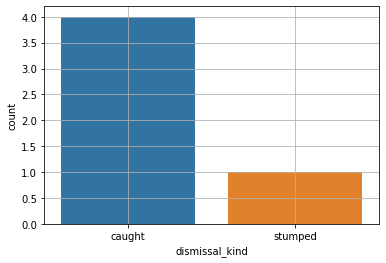

In [98]:
sb.countplot(david['dismissal_kind'])
plt.grid()
plt.show()

In [99]:
# catch - 4 times
# Stump - 1 times

In [101]:
main_df_team_all_srh = df[((((df['batting_team'] == 'Sunrisers Hyderabad'))))]
main_df_team_all_srh

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178462,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,5,Mohammad Nabi,DJ Hooda,K Paul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178463,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,6,Mohammad Nabi,DJ Hooda,K Paul,0,...,0,0,0,0,0,0,0,Mohammad Nabi,caught,AR Patel
178464,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,7,DJ Hooda,Rashid Khan,K Paul,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178465,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,8,Rashid Khan,B Kumar,K Paul,0,...,0,0,0,0,0,0,0,Rashid Khan,caught,RR Pant


In [102]:
david_all = main_df_team_all_srh[main_df_team_all_srh['batsman'] == 'DA Warner']


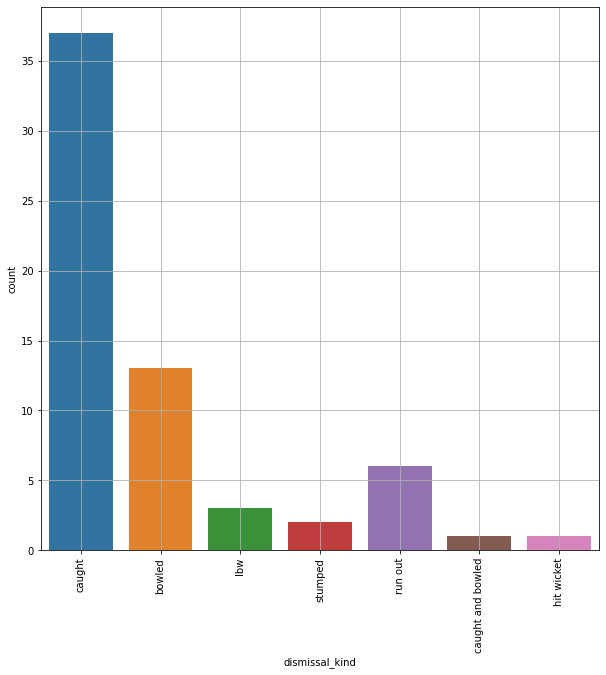

caught               37
bowled               13
run out               6
lbw                   3
stumped               2
hit wicket            1
caught and bowled     1
Name: dismissal_kind, dtype: int64


In [106]:
plt.figure(figsize = (10,10))
sb.countplot(david_all['dismissal_kind'])
plt.grid()
plt.xticks(rotation = 90)
plt.show()
print(david_all['dismissal_kind'].value_counts())

In [107]:
## He has been out many num of times by catch

In [108]:
## But in last match , he got stump out

# Take Aways :
### 1 - David gets out more time by catch wrt RR and wrt all team
### 2 - In last match he got out by bold


# Ques 3 ans - Caught

In [109]:
###############################################################################################################################3

# Ques 4 - Who will score the most runs for RR ?

In [205]:
main_df_team_rr = main_df_team[main_df_team['batting_team'] == 'Rajasthan Royals']

In [224]:
main_df_team_rr

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
98568,416,2,Rajasthan Royals,Sunrisers Hyderabad,1,1,R Dravid,AM Rahane,DW Steyn,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98569,416,2,Rajasthan Royals,Sunrisers Hyderabad,1,2,R Dravid,AM Rahane,DW Steyn,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
98570,416,2,Rajasthan Royals,Sunrisers Hyderabad,1,3,AM Rahane,R Dravid,DW Steyn,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98571,416,2,Rajasthan Royals,Sunrisers Hyderabad,1,4,AM Rahane,R Dravid,DW Steyn,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98572,416,2,Rajasthan Royals,Sunrisers Hyderabad,1,5,AM Rahane,R Dravid,DW Steyn,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175660,11336,2,Rajasthan Royals,Sunrisers Hyderabad,19,3,A Turner,SV Samson,S Kaul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
175661,11336,2,Rajasthan Royals,Sunrisers Hyderabad,19,4,A Turner,SV Samson,S Kaul,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175662,11336,2,Rajasthan Royals,Sunrisers Hyderabad,19,5,SV Samson,A Turner,S Kaul,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN
175663,11336,2,Rajasthan Royals,Sunrisers Hyderabad,19,6,A Turner,SV Samson,S Kaul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [226]:
main_df_team_rr['match_id'].unique()

array([  416,   449,   455,   461,   487,   529,   558,  7897,  7921,
       11144, 11336], dtype=int64)

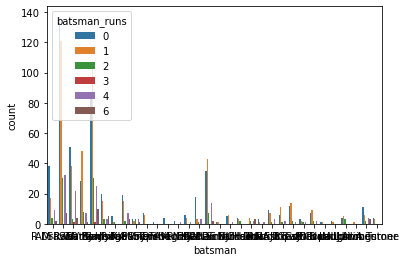

In [231]:
sb.countplot(main_df_team_rr['batsman'], hue =  main_df_team_rr['batsman_runs'])

In [232]:
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
98439,416,1,Sunrisers Hyderabad,Rajasthan Royals,1,1,PA Reddy,S Dhawan,A Chandila,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98440,416,1,Sunrisers Hyderabad,Rajasthan Royals,1,2,PA Reddy,S Dhawan,A Chandila,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98441,416,1,Sunrisers Hyderabad,Rajasthan Royals,1,3,PA Reddy,S Dhawan,A Chandila,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
98442,416,1,Sunrisers Hyderabad,Rajasthan Royals,1,4,PA Reddy,S Dhawan,A Chandila,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98443,416,1,Sunrisers Hyderabad,Rajasthan Royals,1,5,PA Reddy,S Dhawan,A Chandila,0,...,0,0,0,0,0,0,0,PA Reddy,caught,SR Watson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175660,11336,2,Rajasthan Royals,Sunrisers Hyderabad,19,3,A Turner,SV Samson,S Kaul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
175661,11336,2,Rajasthan Royals,Sunrisers Hyderabad,19,4,A Turner,SV Samson,S Kaul,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175662,11336,2,Rajasthan Royals,Sunrisers Hyderabad,19,5,SV Samson,A Turner,S Kaul,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN
175663,11336,2,Rajasthan Royals,Sunrisers Hyderabad,19,6,A Turner,SV Samson,S Kaul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
# smith = 2 , samson = 3 , buttler = 0 ,Other = 6

In [ ]:
## from this data , wrt srh , samson always score highest point

In [157]:
## Lets check wrt all team

In [160]:
main_df_team_all['bowling_team'].unique()

array(['Sunrisers Hyderabad'], dtype=object)

In [234]:
main_df_team_all_rr = df[((((df['batting_team'] == 'Rajasthan Royals'))))]
main_df_team_all_rr

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14335,62,1,Rajasthan Royals,Delhi Daredevils,1,1,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14336,62,1,Rajasthan Royals,Delhi Daredevils,1,2,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14337,62,1,Rajasthan Royals,Delhi Daredevils,1,3,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14338,62,1,Rajasthan Royals,Delhi Daredevils,1,4,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
14339,62,1,Rajasthan Royals,Delhi Daredevils,1,5,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177290,11344,1,Rajasthan Royals,Delhi Capitals,20,3,VR Aaron,R Parag,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177291,11344,1,Rajasthan Royals,Delhi Capitals,20,4,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177292,11344,1,Rajasthan Royals,Delhi Capitals,20,5,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177293,11344,1,Rajasthan Royals,Delhi Capitals,20,6,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [240]:
main_df_team_rr = main_df_team_all_rr[main_df_team_all_rr['batting_team'] == 'Rajasthan Royals']

In [239]:
main_df_team_rr.groupby(['match_id' , 'batsman'])['batsman_runs'].sum()

match_id  batsman   
62        D Salunkhe    26
          DS Lehmann     1
          M Kaif         9
          M Rawat        2
          RA Jadeja     29
                        ..
11344     R Parag       55
          S Gopal       12
          STR Binny      0
          SV Samson      6
          VR Aaron       3
Name: batsman_runs, Length: 1101, dtype: int64

In [241]:
# From this data , Sanju Samson has the highest run compared to others

# Ques 4 ans  - Sanju Samson

In [181]:
###########################################################################################################################

# Ques 5 - No ball bowled

In [183]:
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
98439,416,1,Sunrisers Hyderabad,Rajasthan Royals,1,1,PA Reddy,S Dhawan,A Chandila,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98440,416,1,Sunrisers Hyderabad,Rajasthan Royals,1,2,PA Reddy,S Dhawan,A Chandila,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98441,416,1,Sunrisers Hyderabad,Rajasthan Royals,1,3,PA Reddy,S Dhawan,A Chandila,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
98442,416,1,Sunrisers Hyderabad,Rajasthan Royals,1,4,PA Reddy,S Dhawan,A Chandila,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98443,416,1,Sunrisers Hyderabad,Rajasthan Royals,1,5,PA Reddy,S Dhawan,A Chandila,0,...,0,0,0,0,0,0,0,PA Reddy,caught,SR Watson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175660,11336,2,Rajasthan Royals,Sunrisers Hyderabad,19,3,A Turner,SV Samson,S Kaul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
175661,11336,2,Rajasthan Royals,Sunrisers Hyderabad,19,4,A Turner,SV Samson,S Kaul,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175662,11336,2,Rajasthan Royals,Sunrisers Hyderabad,19,5,SV Samson,A Turner,S Kaul,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN
175663,11336,2,Rajasthan Royals,Sunrisers Hyderabad,19,6,A Turner,SV Samson,S Kaul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [186]:
main_df_team.groupby('match_id')['noball_runs'].sum()

match_id
416      0
449      0
455      0
461      0
487      0
529      1
558      0
7897     1
7921     0
11144    1
11336    0
Name: noball_runs, dtype: int64

In [188]:
# mode of no-ball is 0 wrt srh and rr

# Take aways:
### 1 = Since , this is a bowling pitch , no ball will be bowled
### 2 = The mode no ball is 0 , and avg is 0.6

# Ques 5 ans - (0-1)